In [329]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# Chapter-3

**10. This question should be answered using the Carseats data set.**

**(a) Fit a multiple regression model to predict Sales**  
- **Price**<br>
- **Urban**<br>
- **US**

In [330]:
from ISLP import load_data
carseats = load_data('Carseats')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [331]:
carseats = pd.get_dummies(carseats,columns=["Urban","US"],drop_first=True)
carseats["Urban_Yes"] = carseats["Urban_Yes"].astype(int)
carseats["US_Yes"] = carseats["US_Yes"].astype(int)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [332]:
x = carseats.loc[:,["Price","Urban_Yes","US_Yes"]]
x =sm.add_constant(x)
y = carseats.Sales

reg = sm.OLS(y,x).fit()
reg.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.39e-23
Time:                        21:31:32   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!**  

- **const (13.04):** Baseline sales = **13,043 units** (Price=$0, Urban="No", US="No").  
- **Price (-0.055):** For every **$1 Increases**, sales **drop by 55 units**  
- **Urban_Yes (-0.02):** Urban stores sell **22 fewer units** than non-urban stores (base)  
- **US_Yes (1.20):** US stores sell **1,201 more units** than non-US stores (base)   
Dummy Base Levels:** "No" for both Urban and US.  

**(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.**

$$ \text{Sales} = 13.0435 - 0.0545 \times \text{Price} - 0.0219 \times \text{Urban\_Yes} + 1.2006 \times \text{US\_Yes} $$


**(d) For which of the predictors can you reject the null hypothesis?**

$$ H_0: \beta_j = 0 $$



- **Price** (p < 0.001) → Significant  
- **US_Yes** (p < 0.001) → Significant  
- **Urban_Yes** (p = 0.936) → Not significant  

**Conclusion:** We reject H₀ for **Price** and **US location**, but not for Urban status.

**(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.**

In [333]:
new_x = x.drop(columns=["Urban_Yes"])
new_x = sm.add_constant(new_x)

new_reg = sm.OLS(y,new_x).fit()
new_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.66e-24
Time:                        21:31:32   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(f) How well do the models in (a) and (e) fit the data?**

In [334]:
print(f"R-squared: {reg.rsquared:.4f}")
print(f"new R-squared: {new_reg.rsquared:.4f}")

R-squared: 0.2393
new R-squared: 0.2393


Removing the Urban from the first model, there is no change in the R-squared value in the second model. Through this we can also   
conclude that Urban has no say in the prediction of the response, hence its better to use the model with two predictors

**(g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).**

In [335]:
Confidence_interval_95 = new_reg.conf_int(0.05).rename(columns={0:"lower_bound",1:"upper_bound"})
Confidence_interval_95 = Confidence_interval_95.drop(index=["const"])
print(Confidence_interval_95)

        lower_bound  upper_bound
Price      -0.06476    -0.044195
US_Yes      0.69152     1.707766


**(h) Is there evidence of outliers or high leverage observations in the
model from (e)?**

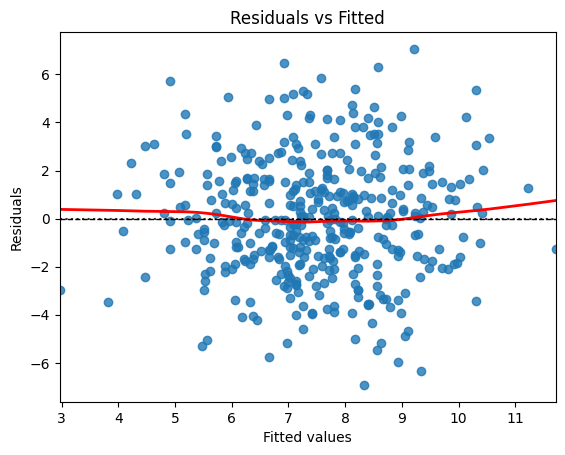

In [336]:
sns.residplot(x=reg.fittedvalues, y=reg.resid, lowess=True,
              line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, color='black', linestyle='--', lw=1)


From the graph we can see the residuals are scattered around zero and exhibit zero pattern. So we can conclude that there's no outlier.

# Chapter-4

**14. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.**

**(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below  
its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add  
a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:  
Auto['mpg01'] = mpg01**

In [337]:
auto = load_data('Auto')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [338]:
auto["mpg01"] = auto["mpg"]> auto["mpg"].median()
auto["mpg01"] = auto["mpg01"].astype(int)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0


**(b) Explore the data graphically in order to investigate the association between mpg01 and the other features.  
Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots  
and boxplots may be useful tools to answer this question. Describe your findings.**

In [339]:
auto.corr()["mpg01"].sort_values(ascending=False)

mpg01           1.000000
mpg             0.836939
origin          0.513698
year            0.429904
acceleration    0.346822
horsepower     -0.667053
displacement   -0.753477
weight         -0.757757
cylinders      -0.759194
Name: mpg01, dtype: float64

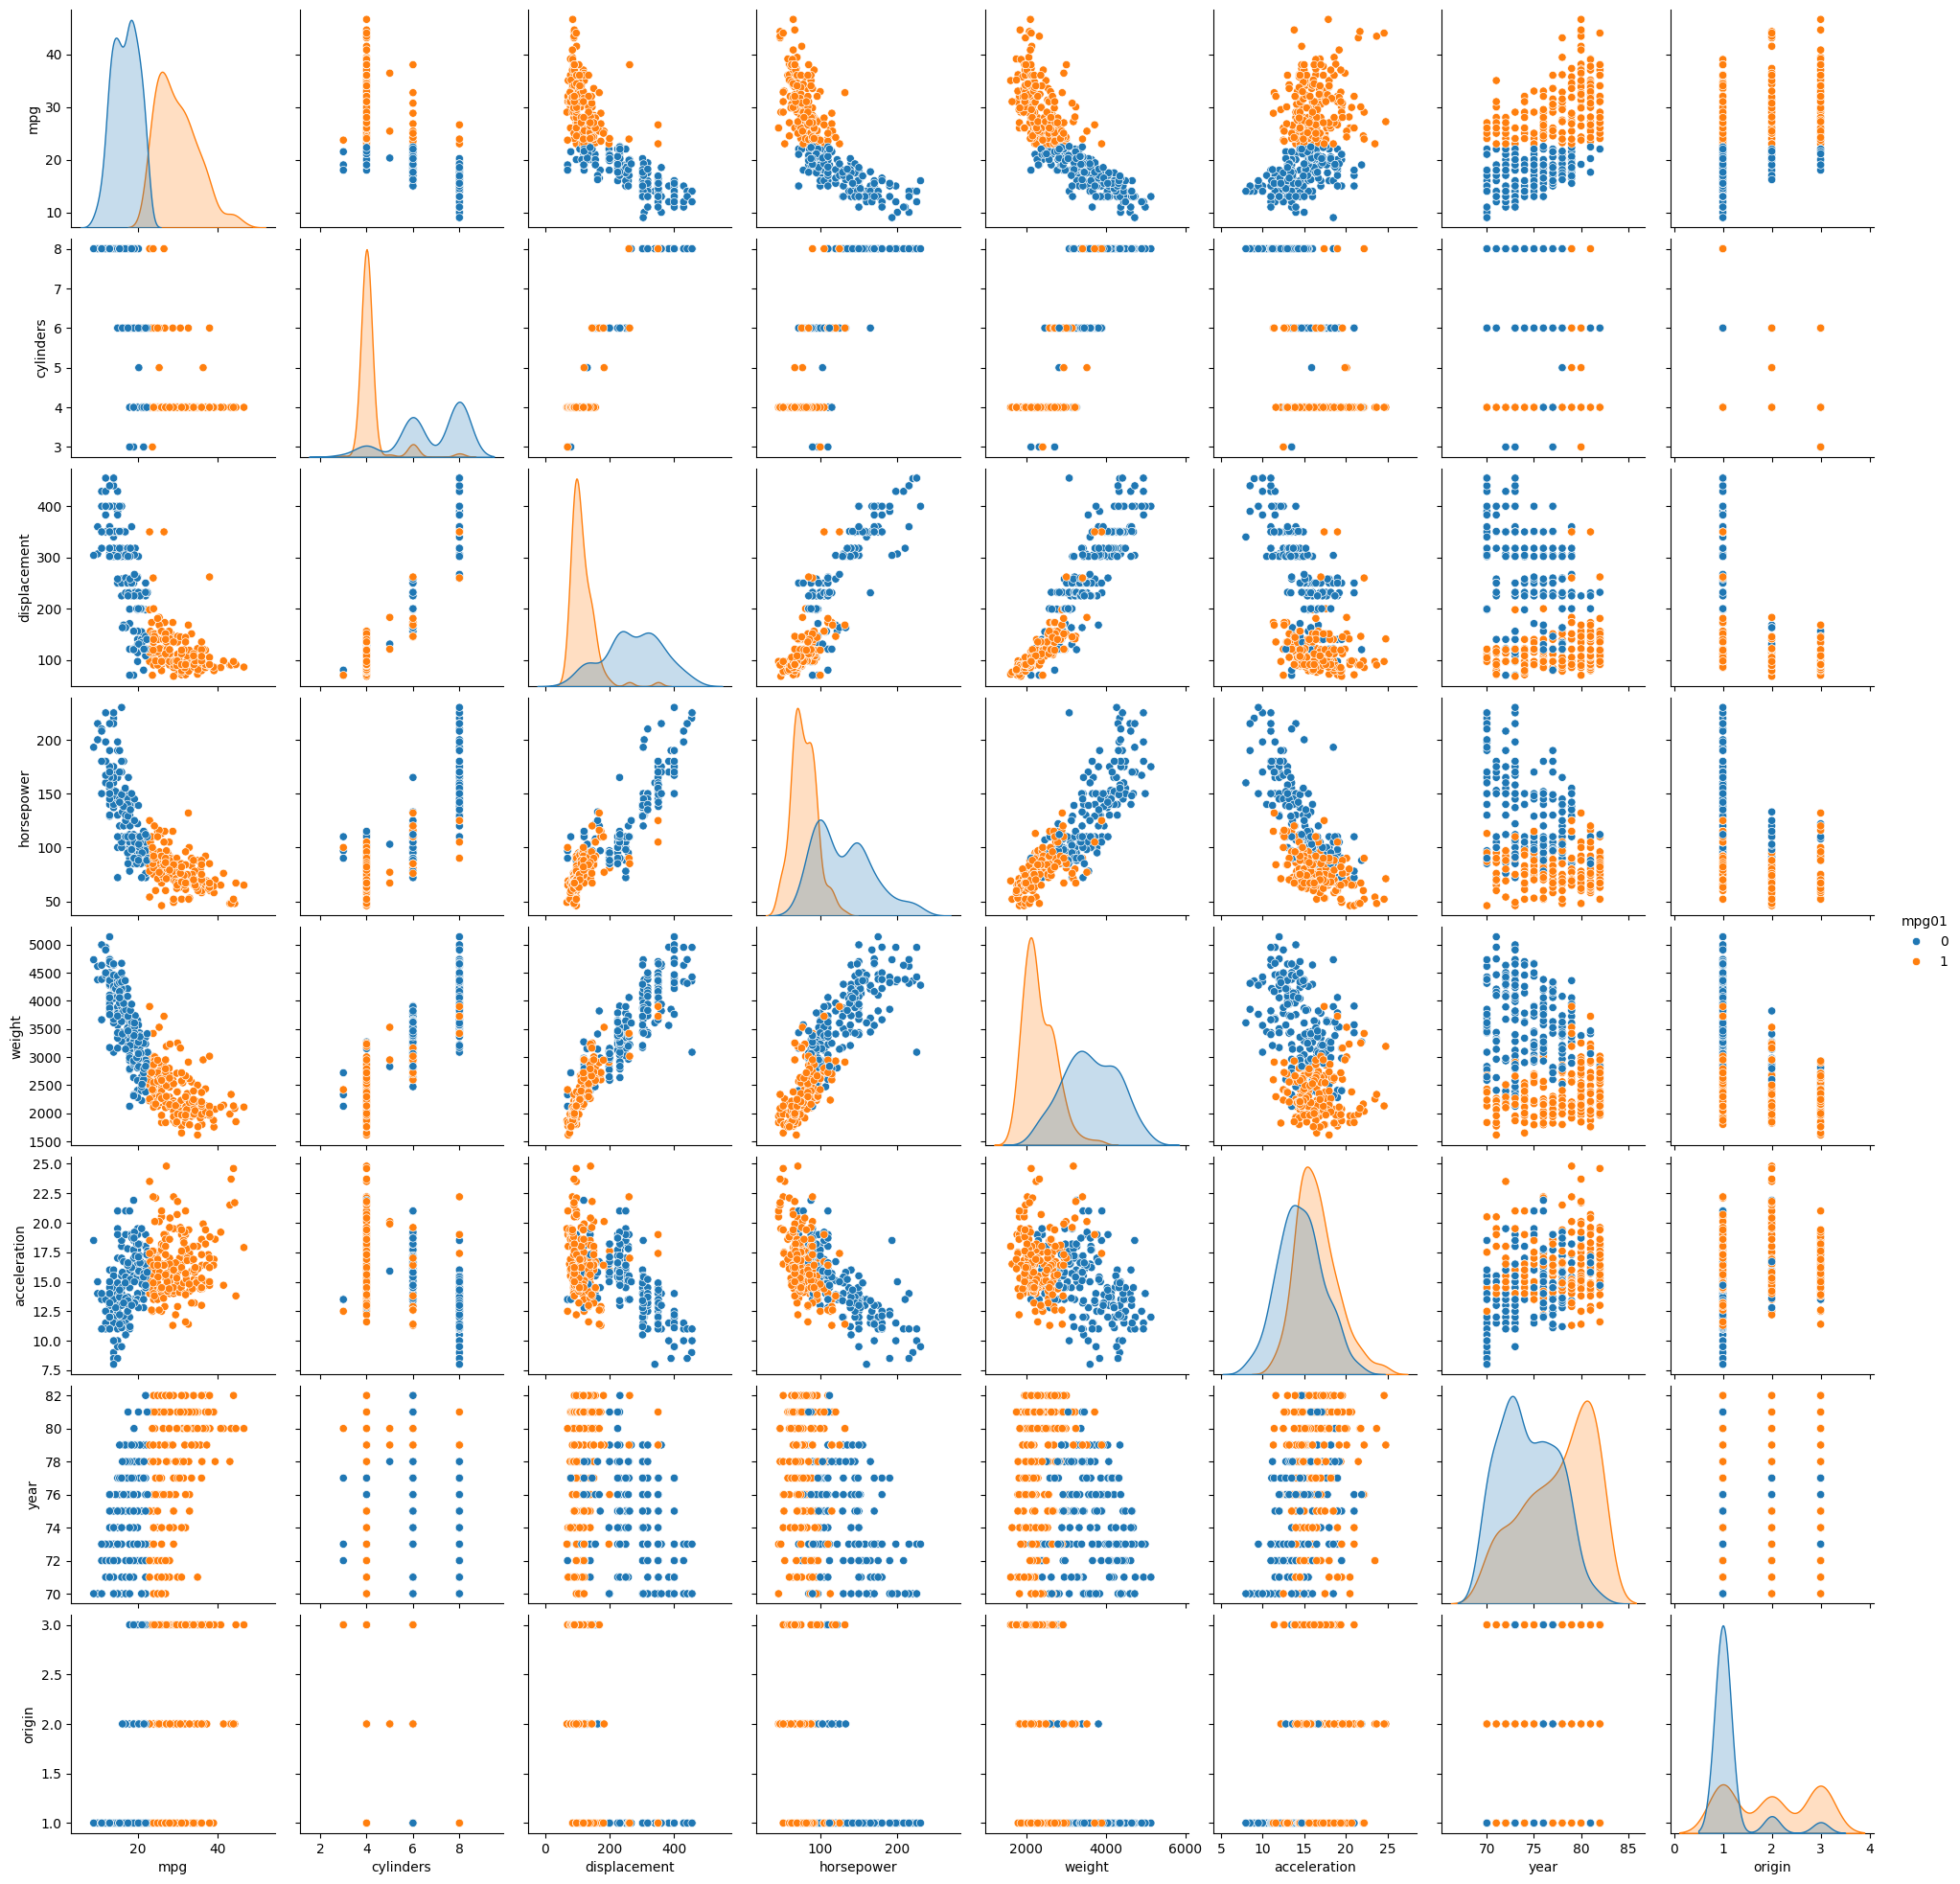

In [340]:
sns.pairplot(auto,hue="mpg01")

<Axes: >

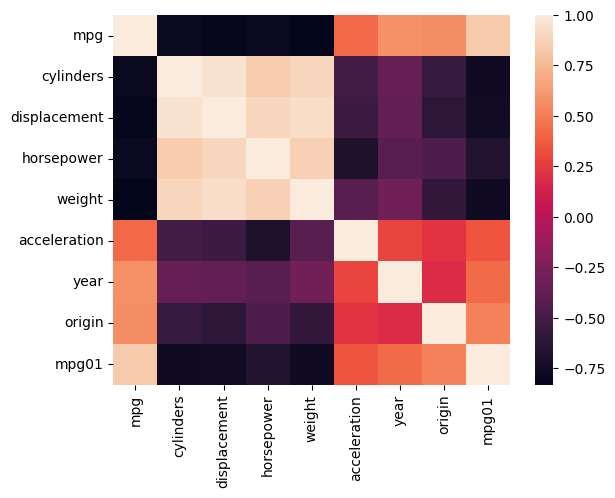

In [341]:
sns.heatmap(auto.corr())

From the pairplot and heatmap we can see Cylinders , displacement , horsepower , weight are highly correlated with mpg01 . we will use this as features . 

**(c) Split the data into a training set and a test set.**

In [342]:
x = auto.loc[:,["cylinders","displacement","horsepower","weight"]].values 
y = auto["mpg01"].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =sc.transform(x_test)

**(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b).  
 What is the test error of the model obtained?**

In [343]:
def classification_model(name,model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
    ac = accuracy_score(y_test, y_pred)
    Test_Error = 1 - ac
    print(f"{name} Confusion Matrix:\n{cm}")
    print(f"{name} Test Error: {Test_Error:.4f}")


In [344]:
classification_model("LDA" ,LinearDiscriminantAnalysis())

LDA Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           34            8
Actual 1            3           34
LDA Test Error: 0.1392


**(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b).  
 What is the test error of the model obtained?**

In [345]:
classification_model("QDA",QuadraticDiscriminantAnalysis(reg_param=0.1))

QDA Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           35            7
Actual 1            3           34
QDA Test Error: 0.1266


**(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b).  
 What is the test error of the model obtained?**

In [346]:
classification_model("Logit",LogisticRegression())

Logit Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           35            7
Actual 1            3           34
Logit Test Error: 0.1266


**(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b).   
What is the test error of the model obtained?**

In [347]:
classification_model("NB",GaussianNB())

NB Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           35            7
Actual 1            3           34
NB Test Error: 0.1266


**(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b).  
What test errors do you obtain? Which value of K seems to perform the best on this data set?**

For KNN = 1

In [348]:
classification_model("KNN_1",KNeighborsClassifier(n_neighbors=1))

KNN_1 Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           36            6
Actual 1            1           36
KNN_1 Test Error: 0.0886


For KNN = 10

In [349]:
classification_model("KNN_10",KNeighborsClassifier(n_neighbors=10))

KNN_10 Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           34            8
Actual 1            3           34
KNN_10 Test Error: 0.1392


For KNN = 100

In [350]:
classification_model("KNN_100",KNeighborsClassifier(n_neighbors=100))

KNN_100 Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           35            7
Actual 1            3           34
KNN_100 Test Error: 0.1266


KNN shows the lowest test error with the value **0.0886**

# Chapter-5

**7. In Sections 5.1.2 and 5.1.3, we saw that the cross_validate() function can be used in order to compute the LOOCV test error estimate.  
Alternatively, one could compute those quantities using just sm.GLM() and the predict() method of the fitted model within a for loop.  
You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set.  
Recall that in the context of classification problems, the LOOCV error is given in (5.4).**

In [351]:
Weekly = load_data('Weekly')
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


**(a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.**

In [352]:
Weekly["Direction"] = Weekly["Direction"].map({"Up":1,"Down":0})
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [353]:
x = Weekly.loc[:,["Lag1","Lag2"]].values
y = Weekly["Direction"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

classifier = LogisticRegression()
classifier.fit(x_train,y_train)


LogisticRegression()

**(b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.**

In [354]:
new_x = Weekly.loc[1:,["Lag1","Lag2"]].values
new_y = Weekly.loc[1:,["Direction"]].values.ravel()

x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=0)

classifier_2 = LogisticRegression()
classifier_2.fit(x_train,y_train)



LogisticRegression()

**(c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation  
will go up if P(Direction = "Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?**

In [355]:
prob_of_Up =classifier_2.predict(Weekly.loc[0,["Lag1","Lag2"]].values.reshape(1,-1))
print(f"Actual value {y_test[0]}\nPredicted value {prob_of_Up[0]}")

Actual value 0
Predicted value 1


As the probability of Direction = "Up" is > 0.5 then prob_of_Up = 1 ,Here the actual Direction of first observation is Down . So , this wasn't correctly classified


**(d) Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:**

In [356]:
x = Weekly.loc[:, ["Lag1", "Lag2"]].values
y = Weekly["Direction"].values

Test_error = []


for i in range(len(y)):
    
    x_train = np.delete(x, i, axis=0)
    y_train = np.delete(y, i)
    x_train_const = sm.add_constant(x_train)

    model = sm.GLM(y_train, x_train_const, family=sm.families.Binomial())
    result = model.fit()

    x_test = x[i].reshape(1, -1)
    x_test_const = sm.add_constant(x_test, has_constant='add')
    
    prob_up = result.predict(x_test_const)[0]

    y_pred = 1 if prob_up > 0.5 else 0
    y_true = y[i]
    
    error = int(y_pred != y_true)
    Test_error.append(error)


**(e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.**

In [357]:

loocv_error = np.mean(Test_error)
print(f"LOOCV Test Error Estimate: {loocv_error:.4f}")

LOOCV Test Error Estimate: 0.4500
